In [4]:
#For plotting
import matplotlib.pyplot as plt
#for matrix math
import numpy as np
#for normalization + probability density function computation
from scipy import stats
#for plotting
import seaborn as sns
sns.set_style("white")
%matplotlib inline

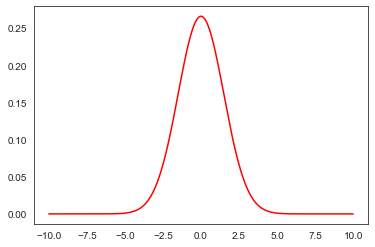

In [6]:
#Return evenly spaced numbers over a specified interval.
x = np.linspace(start=-10, stop=10, num=1000)
#A normal continuous random variable.
#The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation.
y = stats.norm.pdf(x, loc=0, scale=1.5) 
#plot it!
plt.plot(x, y,'r')

In [9]:
import pandas as pd
path='https://raw.githubusercontent.com/brianspiering/gaussian_mixture_models/master/bimodal_example.csv'
df = pd.read_csv(path)
#show first 5 examples (in BTC)
df.head(6)

,x
0,0.252851
1,-1.034562
2,3.319558
3,4.552363
4,-0.775995
5,2.937873


In [10]:
#show the distribution of the data as a histogram
data = df.x

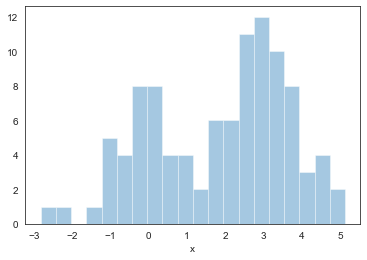

In [11]:
#plot histogram
sns.distplot(data, bins=20, kde=False)

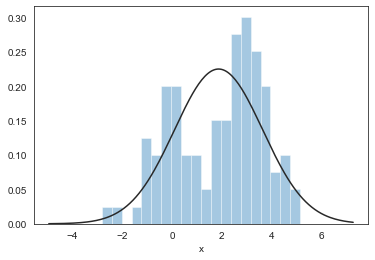

In [12]:
#try to fit a normal distribution to this data
sns.distplot(data, fit=stats.norm, bins=20, kde=False,)

In [13]:
class Gaussian:
    "Model univariate Gaussian"
    def __init__(self, mu, sigma):
        #mean and standard deviation
        self.mu = mu
        self.sigma = sigma

    #probability density function
    def pdf(self, datum):
        "Probability of a data point given the current parameters"
        u = (datum - self.mu) / abs(self.sigma)
        y = (1 / (sqrt(2 * pi) * abs(self.sigma))) * exp(-u * u / 2)
        return y
    #printing model values
    def __repr__(self):
        return 'Gaussian({0:4.6}, {1:4.6})'.format(self.mu, self.sigma)

In [14]:
#gaussian of best fit
best_single = Gaussian(np.mean(data), np.std(data))
print('Best single Gaussian: μ = {:.2}, σ = {:.2}'.format(best_single.mu, best_single.sigma))

Best single Gaussian: μ = 1.9, σ = 1.8


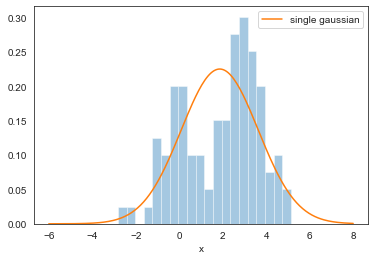

In [15]:
#fit a single gaussian curve to the data
x = np.linspace(-6, 8, 200)
g_single = stats.norm(best_single.mu, best_single.sigma).pdf(x)
sns.distplot(data, bins=20, kde=False, norm_hist=True)
plt.plot(x, g_single, label='single gaussian')
plt.legend();

In [29]:
from sklearn.mixture import GaussianMixture

In [33]:
gmm = GaussianMixture(n_components=2)
gmm.fit(df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [34]:
print(gmm.means_)
print('\n')
print(gmm.covariances_)

[[-0.11889241]
 [ 3.03823226]]


[[[0.8972336 ]]

 [[0.74927808]]]


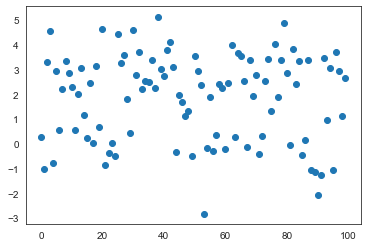

In [37]:

plt.scatter(np.arange(100),df.iloc[:,0])

plt.show()